## E-Commerce Transaction Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Machine Learning Libraries

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Import the E-Commerce CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('Data/data.csv', encoding='latin-1')

#### Show Top 5 Records and Dataset Info

In [3]:
print("Dataset Shape:", df.shape)
print("\nFirst few records:")
df.head()

Dataset Shape: (541909, 8)

First few records:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Data Preprocessing and Feature Engineering

In [4]:
# Remove rows with missing values
df = df.dropna()

# Create revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Extract date features
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

print("Dataset Info after preprocessing:")
print(df.info())

Dataset Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Revenue      406829 non-null  float64       
 9   Month        406829 non-null  int32         
 10  Day          406829 non-null  int32         
 11  Hour         406829 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 35.7+ MB
None


In [5]:
print("First 5 rows after preprocessing:")
df.head()

First 5 rows after preprocessing:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8


In [6]:
print("Unique Countries:", df['Country'].nunique())
print("Sample Countries:", df['Country'].unique()[:10])

print("\nStockCode range:")
print("Min StockCode:", df['StockCode'].min())
print("Max StockCode:", df['StockCode'].max())

print("\nQuantity Statistics:")
print(df['Quantity'].describe())

print("\nUnitPrice Statistics:")
print(df['UnitPrice'].describe())

print("\nRevenue Statistics:")
print(df['Revenue'].describe())

Unique Countries: 37
Sample Countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland']

StockCode range:
Min StockCode: 10002
Max StockCode: POST

Quantity Statistics:
count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

UnitPrice Statistics:
count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

Revenue Statistics:
count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Revenue, dtype: float64


In [7]:
# Target variable: Quantity (predicting how much will be purchased)
y = df['Quantity']

# Features: Drop non-numeric columns and target
X = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Quantity', 'CustomerID'], axis=1)

In [8]:
print("Feature columns:", X.columns.tolist())
print("\nTarget (Quantity) distribution:")
print(y.describe())

Feature columns: ['UnitPrice', 'Country', 'Revenue', 'Month', 'Day', 'Hour']

Target (Quantity) distribution:
count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


In [9]:
# Identify numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

print("Numeric Features:", num_features)
print("Categorical Features:", cat_features)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

Numeric Features: ['UnitPrice', 'Revenue', 'Month', 'Day', 'Hour']
Categorical Features: ['Country']


In [10]:
X_transformed = preprocessor.fit_transform(X)

In [11]:
print("Transformed feature shape:", X_transformed.shape)

Transformed feature shape: (406829, 41)


In [12]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (325463, 41)
Test set shape: (81366, 41)


#### Create an Evaluate Function to Calculate Metrics

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42, verbosity=0), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42)
}

model_list = []
r2_list = []
mae_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 103.9812
- Mean Absolute Error: 9.7889
- R2 Score: 0.8594
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 46.7277
- Mean Absolute Error: 9.2551
- R2 Score: -0.2670


Lasso
Model performance for Training set
- Root Mean Squared Error: 104.0101
- Mean Absolute Error: 9.7192
- R2 Score: 0.8593
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 46.6851
- Mean Absolute Error: 9.1932
- R2 Score: -0.2647


Ridge
Model performance for Training set
- Root Mean Squared Error: 103.9812
- Mean Absolute Error: 9.7882
- R2 Score: 0.8594
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 46.7273
- Mean Absolute Error: 9.2546
- R2 Score: -0.2669




  File "c:\Users\Srujan Kinjawadekar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Srujan Kinjawadekar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Srujan Kinjawadekar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 191.8250
- Mean Absolute Error: 4.1163
- R2 Score: 0.5214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 30.5156
- Mean Absolute Error: 4.3235
- R2 Score: 0.4597


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.1191
- Mean Absolute Error: 0.0003
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.2125
- Mean Absolute Error: 0.2133
- R2 Score: 0.9271


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 78.9870
- Mean Absolute Error: 0.3563
- R2 Score: 0.9188
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.7263
- Mean Absolute Error: 0.1601
- R2 Score: 0.9332


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 17.3124
- Mean Absolute Error: 1.2742
- R2 Score: 0.

### Model Comparison Results

In [15]:
results_df = pd.DataFrame(
    list(zip(model_list, r2_list, mae_list)), 
    columns=['Model Name', 'R2_Score', 'MAE']
).sort_values(by=["R2_Score"], ascending=False)
print(results_df)

                Model Name  R2_Score        MAE
5  Random Forest Regressor  0.933240   0.160092
4            Decision Tree  0.927051   0.213308
3    K-Neighbors Regressor  0.459670   4.323545
8       AdaBoost Regressor  0.128508  11.620838
1                    Lasso -0.264654   9.193177
2                    Ridge -0.266939   9.254586
0        Linear Regression -0.266962   9.255137
7    CatBoosting Regressor -4.432189   2.214277
6             XGBRegressor -6.937735   2.276720


## Best Model - Linear Regression Analysis

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
print("Linear Regression Model Performance:")
print(f"- MAE: {mae:.4f}")
print(f"- RMSE: {rmse:.4f}")
print(f"- R2 Score: {r2:.4f}")
print(f"- Accuracy: {r2*100:.2f}%")

Linear Regression Model Performance:
- MAE: 9.2551
- RMSE: 46.7277
- R2 Score: -0.2670
- Accuracy: -26.70%


## Visualization: Actual vs Predicted Quantity

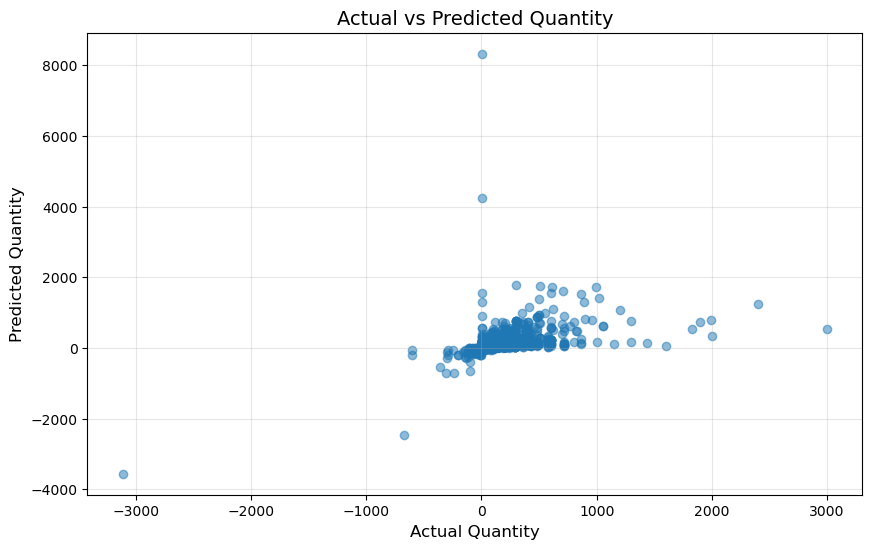

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Quantity', fontsize=12)
plt.ylabel('Predicted Quantity', fontsize=12)
plt.title('Actual vs Predicted Quantity', fontsize=14)
plt.grid(True, alpha=0.3)

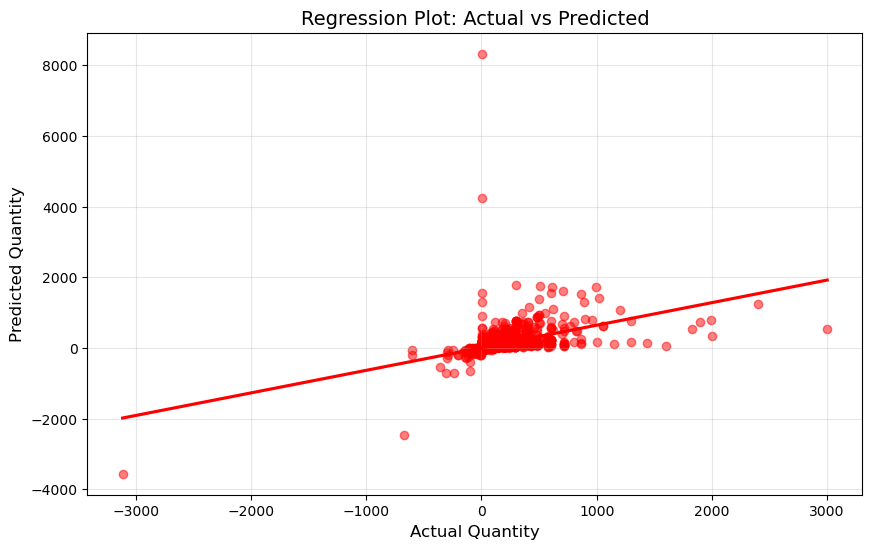

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, color='red', scatter_kws={'alpha':0.5})
plt.xlabel('Actual Quantity', fontsize=12)
plt.ylabel('Predicted Quantity', fontsize=12)
plt.title('Regression Plot: Actual vs Predicted', fontsize=14)
plt.grid(True, alpha=0.3)

#### Difference between Actual and Predicted Quantity Values

In [19]:
pred_df = pd.DataFrame({
    'Actual Quantity': y_test.values, 
    'Predicted Quantity': y_pred, 
    'Difference': y_test.values - y_pred,
    'Absolute Error': np.abs(y_test.values - y_pred)
})
print("First 20 predictions:")
pred_df.head(20)

First 20 predictions:


,Actual Quantity,Predicted Quantity,Difference,Absolute Error
0,2,11.835471,-9.835471,9.835471
1,4,9.786518,-5.786518,5.786518
2,-4,-1.989836,-2.010164,2.010164
3,4,3.453029,0.546971,0.546971
4,24,6.734410,17.265590,17.265590
5,2,2.301480,-0.301480,0.301480
6,1,4.925778,-3.925778,3.925778
7,24,49.366868,-25.366868,25.366868
8,2,12.431888,-10.431888,10.431888
9,8,9.562837,-1.562837,1.562837


In [20]:
print("Summary Statistics of Predictions:")
print(pred_df.describe())

Summary Statistics of Predictions:
       Actual Quantity  Predicted Quantity    Difference  Absolute Error
count     81366.000000        81366.000000  81366.000000    81366.000000
mean         11.976870           11.931239      0.045631        9.255137
std          41.514068           51.599343     46.727964       45.802250
min       -3114.000000        -3562.240053  -8328.745213        0.000014
25%           2.000000            2.441468     -4.390633        1.217760
50%           5.000000            6.757637     -0.094449        3.659528
75%          12.000000           11.364376      2.971676        8.665610
max        3000.000000         8329.745213   2477.576289     8328.745213
